In [1]:
# Import pandas and numpy Libraries
import pandas as pd
import numpy as np

# Import pandas and matplotlib modules for Data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Import scikit-learn module for module building
from sklearn.tree import DecisionTreeClassifier

 

# Import scikit-Learn module for train and test data
from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Import modele for classification Report
from sklearn.metrics import classification_report

In [2]:
filename1 = 'C:/Users/Gayathri/Desktop/MS UNT/Capestone/waze_final_dallas_county.csv'
df = pd.read_csv(filename1)
df.head(5)

,EVENT_ID,EVENT_TYPE,FACILITY_NAME,DIRECTION,CREATE_TIME,LAST_UPDATE,CLOSE_TIME,EVENT_DESCRIPTION,CITY,COUNTY,STATE,LAT,LON,Duration,Day,Create_day,Create_time,Dayofweek
0,'2018113000155100005075',stopped car on the shoulder,I-30 E,Eastbound,11/30/2018 12:15:51 AM,11/30/2018 1:44:37 AM,11/30/2018 1:44:37 AM,Waze Alert: stopped car on the shoulder on I-3...,Grand Prairie,Dallas,TX,32.762133,-96.948700,88.766667,Friday,2018-11-30,00:15:51,4
1,'2018113000194800005075',stopped car on the shoulder,US-75 N,Northbound,11/30/2018 12:19:48 AM,11/30/2018 1:10:34 AM,11/30/2018 1:10:34 AM,Waze Alert: stopped car on the shoulder on US-...,Dallas,Dallas,TX,32.914223,-96.767735,50.766667,Friday,2018-11-30,00:19:48,4
2,'2018113000215800005075',stopped car on the shoulder,I-30 E,Eastbound,11/30/2018 12:21:58 AM,11/30/2018 1:40:35 AM,11/30/2018 1:40:35 AM,Waze Alert: stopped car on the shoulder on I-3...,Grand Prairie,Dallas,TX,32.759152,-97.004621,78.616667,Friday,2018-11-30,00:21:58,4
3,'2018113000224700005075',stopped car on the shoulder,I-635 W,Westbound,11/30/2018 12:22:47 AM,11/30/2018 1:02:37 AM,11/30/2018 1:02:37 AM,Waze Alert: stopped car on the shoulder on I-6...,Garland,Dallas,TX,32.869490,-96.670000,39.833333,Friday,2018-11-30,00:22:47,4
4,'2018113000273400005075',stopped car,President George Bush Tpk E,Southbound,11/30/2018 12:27:34 AM,11/30/2018 1:06:37 AM,11/30/2018 1:06:37 AM,Waze Alert: stopped car on President George Bu...,Richardson,Dallas,TX,32.982323,-96.665009,39.050000,Friday,2018-11-30,00:27:34,4


In [3]:
df.loc[(df.EVENT_TYPE == 'accident') | (df.EVENT_TYPE == 'minor accident'), 'Predict'] = 1
df.loc[(df.EVENT_TYPE != 'accident') & (df.EVENT_TYPE != 'minor accident'), 'Predict'] = 0

In [4]:
df['hours'] = pd.to_datetime(df['Create_time']).dt.round('H').dt.hour

In [5]:

df.loc[((df.hours >= 6) & (df.hours <=10)) | ((df.hours >= 16) & (df.hours <=19)), 'Peak_hour'] = 1

In [6]:
df.loc[((df.hours < 6) | (df.hours >10)) | ((df.hours < 16) & (df.hours >19)), 'Peak_hour'] = 0

In [7]:
df.head(4)

,EVENT_ID,EVENT_TYPE,FACILITY_NAME,DIRECTION,CREATE_TIME,LAST_UPDATE,CLOSE_TIME,EVENT_DESCRIPTION,CITY,COUNTY,...,LAT,LON,Duration,Day,Create_day,Create_time,Dayofweek,Predict,hours,Peak_hour
0,'2018113000155100005075',stopped car on the shoulder,I-30 E,Eastbound,11/30/2018 12:15:51 AM,11/30/2018 1:44:37 AM,11/30/2018 1:44:37 AM,Waze Alert: stopped car on the shoulder on I-3...,Grand Prairie,Dallas,...,32.762133,-96.948700,88.766667,Friday,2018-11-30,00:15:51,4,0.0,0,0.0
1,'2018113000194800005075',stopped car on the shoulder,US-75 N,Northbound,11/30/2018 12:19:48 AM,11/30/2018 1:10:34 AM,11/30/2018 1:10:34 AM,Waze Alert: stopped car on the shoulder on US-...,Dallas,Dallas,...,32.914223,-96.767735,50.766667,Friday,2018-11-30,00:19:48,4,0.0,0,0.0
2,'2018113000215800005075',stopped car on the shoulder,I-30 E,Eastbound,11/30/2018 12:21:58 AM,11/30/2018 1:40:35 AM,11/30/2018 1:40:35 AM,Waze Alert: stopped car on the shoulder on I-3...,Grand Prairie,Dallas,...,32.759152,-97.004621,78.616667,Friday,2018-11-30,00:21:58,4,0.0,0,0.0
3,'2018113000224700005075',stopped car on the shoulder,I-635 W,Westbound,11/30/2018 12:22:47 AM,11/30/2018 1:02:37 AM,11/30/2018 1:02:37 AM,Waze Alert: stopped car on the shoulder on I-6...,Garland,Dallas,...,32.869490,-96.670000,39.833333,Friday,2018-11-30,00:22:47,4,0.0,0,0.0


In [11]:
df['Predict'].value_counts()

0.0    1134027
1.0      16097
Name: Predict, dtype: int64

In [250]:
df['EVENT_TYPE'].value_counts()

traffic jam                        634000
heavy traffic                      146313
stopped car on the shoulder        136828
stopped traffic                     76752
traffic heavier than normal         42278
slowdown                            19754
stopped car                         16734
road construction                   14859
object on roadway                   13492
accident                             8118
minor accident                       7979
pothole                              7760
major event                          6673
small traffic jam                    5339
other                                4108
road closed                          1582
medium traffic jam                   1510
animal struck                         778
flooding                              764
malfunctioning traffic light          702
animal on the shoulder                672
hazard on the shoulder                625
missing sign on the shoulder          579
large traffic jam                 

In [13]:
df['EVENT_TYPE'].value_counts()

traffic jam                        634000
heavy traffic                      146313
stopped car on the shoulder        136828
stopped traffic                     76752
traffic heavier than normal         42278
slowdown                            19754
stopped car                         16734
road construction                   14859
object on roadway                   13492
accident                             8118
minor accident                       7979
pothole                              7760
major event                          6673
small traffic jam                    5339
other                                4108
road closed                          1582
medium traffic jam                   1510
animal struck                         778
flooding                              764
malfunctioning traffic light          702
animal on the shoulder                672
hazard on the shoulder                625
missing sign on the shoulder          579
large traffic jam                 

In [655]:
df.loc[(df.EVENT_TYPE == 'accident') | (df.EVENT_TYPE == 'minor accident'), 'Event_type'] = 'accident'

df.loc[(df.EVENT_TYPE == 'traffic jam'), 'Event_type'] = 'traffic jam'

df.loc[(df.EVENT_TYPE == 'heavy traffic'), 'Event_type'] = 'heavy traffic'

df.loc[(df.EVENT_TYPE == 'stopped traffic'), 'Event_type'] = 'stopped traffic'

df.loc[(df.EVENT_TYPE == 'traffic heavier than normal'), 'Event_type'] = 'traffic heavier than normal'

df.loc[(df.EVENT_TYPE == 'small traffic jam'), 'Event_type'] = 'small traffic jam'

df.loc[(df.EVENT_TYPE == 'road construction'), 'Event_type'] = 'road construction'

df.loc[(df.EVENT_TYPE == 'weather hazard'), 'Event_type'] = 'weather'
df.loc[(df.EVENT_TYPE == 'hail'),'Event_type']= 'weather'
df.loc[(df.EVENT_TYPE == 'fog') ,'Event_type']='weather'
df.loc[(df.EVENT_TYPE == 'ice on roadway'),'Event_type']='weather'
df.loc[(df.EVENT_TYPE == 'flooding'),'Event_type']='weather'


df.loc[(df.EVENT_TYPE == 'stopped car on the shoulder') | (df.EVENT_TYPE == 'slowdown') | (df.EVENT_TYPE == 'stopped car')|
       (df.EVENT_TYPE == 'object on roadway')|
       (df.EVENT_TYPE == 'pothole') | (df.EVENT_TYPE == 'major event')|
       (df.EVENT_TYPE == 'other') | (df.EVENT_TYPE == 'road closed')|
       (df.EVENT_TYPE == 'medium traffic jam') | (df.EVENT_TYPE == 'animal struck')|
        (df.EVENT_TYPE == 'malfunctioning traffic light')|
       (df.EVENT_TYPE == 'missing sign on the shoulder') | (df.EVENT_TYPE == 'large traffic jam')|
       (df.EVENT_TYPE == 'road closed due to construction') | (df.EVENT_TYPE == 'hazard on road')|
       (df.EVENT_TYPE == 'weather hazard') | (df.EVENT_TYPE == 'hail')|
       (df.EVENT_TYPE == 'road closed due to hazard') | (df.EVENT_TYPE == 'huge traffic jam')|
       (df.EVENT_TYPE == 'animal on the shoulder') | (df.EVENT_TYPE == 'hazard on the shoulder'),'Event_type'] = 'Other'




In [657]:
df['Event_type'].value_counts()

traffic jam                    634000
Other                          213336
heavy traffic                  146313
stopped traffic                 76752
traffic heavier than normal     42278
accident                        16097
road construction               14859
small traffic jam                5339
weather                          1150
Name: Event_type, dtype: int64

In [319]:
df.head(4)

,EVENT_ID,EVENT_TYPE,FACILITY_NAME,DIRECTION,CREATE_TIME,LAST_UPDATE,CLOSE_TIME,EVENT_DESCRIPTION,CITY,COUNTY,...,LON,Duration,Day,Create_day,Create_time,Dayofweek,Predict,hours,Peak_hour,Event_type
0,'2018113000155100005075',stopped car on the shoulder,I-30 E,Eastbound,11/30/2018 12:15:51 AM,11/30/2018 1:44:37 AM,11/30/2018 1:44:37 AM,Waze Alert: stopped car on the shoulder on I-3...,Grand Prairie,Dallas,...,-96.948700,88.766667,Friday,2018-11-30,00:15:51,4,0.0,0,0.0,Other
1,'2018113000194800005075',stopped car on the shoulder,US-75 N,Northbound,11/30/2018 12:19:48 AM,11/30/2018 1:10:34 AM,11/30/2018 1:10:34 AM,Waze Alert: stopped car on the shoulder on US-...,Dallas,Dallas,...,-96.767735,50.766667,Friday,2018-11-30,00:19:48,4,0.0,0,0.0,Other
2,'2018113000215800005075',stopped car on the shoulder,I-30 E,Eastbound,11/30/2018 12:21:58 AM,11/30/2018 1:40:35 AM,11/30/2018 1:40:35 AM,Waze Alert: stopped car on the shoulder on I-3...,Grand Prairie,Dallas,...,-97.004621,78.616667,Friday,2018-11-30,00:21:58,4,0.0,0,0.0,Other
3,'2018113000224700005075',stopped car on the shoulder,I-635 W,Westbound,11/30/2018 12:22:47 AM,11/30/2018 1:02:37 AM,11/30/2018 1:02:37 AM,Waze Alert: stopped car on the shoulder on I-6...,Garland,Dallas,...,-96.670000,39.833333,Friday,2018-11-30,00:22:47,4,0.0,0,0.0,Other


In [658]:
df['Event_type'].value_counts()

traffic jam                    634000
Other                          213336
heavy traffic                  146313
stopped traffic                 76752
traffic heavier than normal     42278
accident                        16097
road construction               14859
small traffic jam                5339
weather                          1150
Name: Event_type, dtype: int64

In [659]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['Event_type'], prefix = ['Event'])

In [660]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150124 entries, 0 to 1150123
Data columns (total 30 columns):
EVENT_ID                             1150124 non-null object
EVENT_TYPE                           1150124 non-null object
FACILITY_NAME                        1150124 non-null object
DIRECTION                            508708 non-null object
CREATE_TIME                          1150124 non-null object
LAST_UPDATE                          1150124 non-null object
CLOSE_TIME                           1150122 non-null object
EVENT_DESCRIPTION                    1150124 non-null object
CITY                                 1150124 non-null object
COUNTY                               1150124 non-null object
STATE                                1150124 non-null object
LAT                                  1150124 non-null float64
LON                                  1150124 non-null float64
Duration                             1150124 non-null float64
Day                            

In [309]:
df_onehot.head(4)

,EVENT_ID,EVENT_TYPE,FACILITY_NAME,DIRECTION,CREATE_TIME,LAST_UPDATE,CLOSE_TIME,EVENT_DESCRIPTION,CITY,COUNTY,...,hours,Peak_hour,Event_Other,Event_accident,Event_heavy traffic,Event_road construction,Event_small traffic jam,Event_stopped traffic,Event_traffic heavier than normal,Event_traffic jam
0,'2018113000155100005075',stopped car on the shoulder,I-30 E,Eastbound,11/30/2018 12:15:51 AM,11/30/2018 1:44:37 AM,11/30/2018 1:44:37 AM,Waze Alert: stopped car on the shoulder on I-3...,Grand Prairie,Dallas,...,0,0.0,1,0,0,0,0,0,0,0
1,'2018113000194800005075',stopped car on the shoulder,US-75 N,Northbound,11/30/2018 12:19:48 AM,11/30/2018 1:10:34 AM,11/30/2018 1:10:34 AM,Waze Alert: stopped car on the shoulder on US-...,Dallas,Dallas,...,0,0.0,1,0,0,0,0,0,0,0
2,'2018113000215800005075',stopped car on the shoulder,I-30 E,Eastbound,11/30/2018 12:21:58 AM,11/30/2018 1:40:35 AM,11/30/2018 1:40:35 AM,Waze Alert: stopped car on the shoulder on I-3...,Grand Prairie,Dallas,...,0,0.0,1,0,0,0,0,0,0,0
3,'2018113000224700005075',stopped car on the shoulder,I-635 W,Westbound,11/30/2018 12:22:47 AM,11/30/2018 1:02:37 AM,11/30/2018 1:02:37 AM,Waze Alert: stopped car on the shoulder on I-6...,Garland,Dallas,...,0,0.0,1,0,0,0,0,0,0,0


In [312]:
df_onehot1=df_onehot[['Create_time','hours','Day','Event_Other','Event_accident','Event_heavy traffic','Event_road construction','Event_small traffic jam','Event_stopped traffic','Event_traffic heavier than normal','Event_traffic jam']]

In [313]:
export_to_csv = df_onehot1.to_csv(r'C:/Users/Gayathri/Desktop/MS UNT/Capestone/SSPS_final_model.csv',index = None,header=True)

In [497]:
feature_cols =['hours','Dayofweek','Event_traffic jam','Event_heavy traffic','Event_stopped traffic','Event_traffic heavier than normal','Event_small traffic jam']

In [498]:
feature_target =['Event_accident']

In [499]:
feature_cols

['hours',
 'Dayofweek',
 'Event_traffic jam',
 'Event_heavy traffic',
 'Event_stopped traffic',
 'Event_traffic heavier than normal',
 'Event_small traffic jam']

In [647]:
X = df_onehot[feature_cols]
Y = df_onehot[feature_target]

In [648]:
Y.Event_accident.value_counts()

0    1134027
1      16097
Name: Event_accident, dtype: int64

In [649]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state =100)                           
                           

model = DecisionTreeClassifier(criterion = "gini", random_state =100, max_depth=8,
                               min_samples_leaf=4)
    
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [652]:
print(confusion_matrix(y_test, predicted))

[[340179      0]
 [  4859      0]]


In [651]:
predicted = model.predict(X_test)

report= classification_report(y_test, predicted)

print(report)

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    340179
          1       0.00      0.00      0.00      4859

avg / total       0.97      0.99      0.98    345038



C:\Users\Gayathri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [485]:
from sklearn import metrics

In [564]:

accuracy_level = metrics.accuracy_score(y_test,predicted)
print(("Accuracy: %.3f%%") % (accuracy_level*100.0))

Accuracy: 98.592%


In [504]:
#Score the accuracy Level
result =model.score(X_test,y_test)
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 98.592%


In [488]:
from sklearn.metrics import confusion_matrix 

In [575]:
print("Confusion Matrix: /n",confusion_matrix(y_test,predicted) )

Confusion Matrix: /n [[340179      0]
 [  4859      0]]


In [506]:
from IPython.display import Image 
from io import StringIO
import pydotplus as pdot
from sklearn import preprocessing
from sklearn import tree

In [566]:
tree.export_graphviz(model,
                    out_file = "model_last.odt",
                    feature_names = feature_cols,class_names=True)

In [567]:
model_tree_graph = pdot.graphviz.graph_from_dot_file("model_last.odt")

In [568]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [569]:
model_tree_graph.write_pdf("tree_last.pdf")

True

In [271]:
export_csv = df_onehot.to_csv(r'C:/Users/Gayathri/Desktop/MS UNT/Capestone/SSPS_model1.csv',index = None,header=True)

### Random Forest

In [480]:
from sklearn.ensemble import RandomForestClassifier

In [665]:
feature_cols =['hours','Dayofweek','Event_traffic jam','Event_heavy traffic','Event_stopped traffic','Event_traffic heavier than normal','Event_small traffic jam','Event_road construction','Event_weather']

In [666]:
feature_cols

['hours',
 'Dayofweek',
 'Event_traffic jam',
 'Event_heavy traffic',
 'Event_stopped traffic',
 'Event_traffic heavier than normal',
 'Event_small traffic jam',
 'Event_road construction',
 'Event_weather']

In [667]:
feature_target =['Event_accident']

In [668]:
X = df_onehot[feature_cols]
Y = df_onehot[feature_target]

In [669]:
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

model1 =RandomForestClassifier(n_estimators=500,criterion='gini')

#Train the model using the training sets y_pred=clf.predict(X_test)
model1.fit(x_train,Y_train)

C:\Users\Gayathri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [670]:
print(confusion_matrix(Y_test, predicted1))

[[340206      0]
 [  4832      0]]


In [671]:
predicted1 = model1.predict(x_test)

report1= classification_report(Y_test, predicted1)

print(report1)

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    340206
          1       0.00      0.00      0.00      4832

avg / total       0.97      0.99      0.98    345038



C:\Users\Gayathri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [672]:
#Score the accuracy Level
accuracy_level1 = metrics.accuracy_score(Y_test,predicted1)
print(("Accuracy: %.3f%%") % (accuracy_level1*100.0))

Accuracy: 98.600%


In [673]:
feature_imp = pd.Series(model1.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

Event_traffic jam                    0.420191
Event_heavy traffic                  0.175324
Event_stopped traffic                0.126724
hours                                0.095460
Event_traffic heavier than normal    0.086977
Event_road construction              0.038751
Dayofweek                            0.033261
Event_small traffic jam              0.018250
Event_weather                        0.005063
dtype: float64

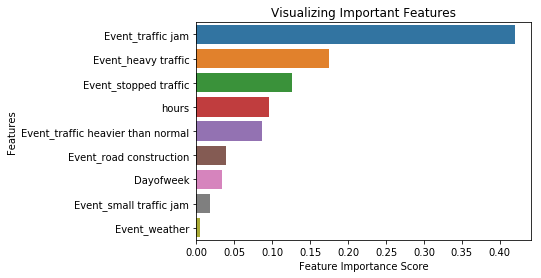

In [674]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

In [386]:
df_onehot['Month'] = pd.to_datetime(df_onehot['Create_day']).dt.month

,EVENT_ID,EVENT_TYPE,FACILITY_NAME,DIRECTION,CREATE_TIME,LAST_UPDATE,CLOSE_TIME,EVENT_DESCRIPTION,CITY,COUNTY,...,Peak_hour,Event_Other,Event_accident,Event_heavy traffic,Event_road construction,Event_small traffic jam,Event_stopped traffic,Event_traffic heavier than normal,Event_traffic jam,Month
0,'2018113000155100005075',stopped car on the shoulder,I-30 E,Eastbound,11/30/2018 12:15:51 AM,11/30/2018 1:44:37 AM,11/30/2018 1:44:37 AM,Waze Alert: stopped car on the shoulder on I-3...,Grand Prairie,Dallas,...,0.0,1,0,0,0,0,0,0,0,11
1,'2018113000194800005075',stopped car on the shoulder,US-75 N,Northbound,11/30/2018 12:19:48 AM,11/30/2018 1:10:34 AM,11/30/2018 1:10:34 AM,Waze Alert: stopped car on the shoulder on US-...,Dallas,Dallas,...,0.0,1,0,0,0,0,0,0,0,11
2,'2018113000215800005075',stopped car on the shoulder,I-30 E,Eastbound,11/30/2018 12:21:58 AM,11/30/2018 1:40:35 AM,11/30/2018 1:40:35 AM,Waze Alert: stopped car on the shoulder on I-3...,Grand Prairie,Dallas,...,0.0,1,0,0,0,0,0,0,0,11
3,'2018113000224700005075',stopped car on the shoulder,I-635 W,Westbound,11/30/2018 12:22:47 AM,11/30/2018 1:02:37 AM,11/30/2018 1:02:37 AM,Waze Alert: stopped car on the shoulder on I-6...,Garland,Dallas,...,0.0,1,0,0,0,0,0,0,0,11


### Nov Month 

In [583]:
df_nov= df_onehot[df_onehot['Month']==11]

In [584]:
df_nov['Event_accident'].value_counts()

0    401172
1      5363
Name: Event_accident, dtype: int64

In [585]:
features =['hours','Dayofweek','Event_traffic jam','Event_heavy traffic','Event_stopped traffic','Event_traffic heavier than normal','Event_small traffic jam']
features

['hours',
 'Dayofweek',
 'Event_traffic jam',
 'Event_heavy traffic',
 'Event_stopped traffic',
 'Event_traffic heavier than normal',
 'Event_small traffic jam']

In [586]:
target =['Event_accident']

In [587]:
X1 = df_nov[features]
Y1 = df_nov[target]

In [588]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.33, random_state = 100)                           
                           

model_nov = RandomForestClassifier(n_estimators=100,criterion='gini')
    
model_nov.fit(X1_train, y1_train)

C:\Users\Gayathri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [592]:
predicted_nov = model_nov.predict(X1_test)

report2= classification_report(y1_test, predicted_nov)

print(report2)

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    132416
          1       0.00      0.00      0.00      1741

avg / total       0.97      0.99      0.98    134157



C:\Users\Gayathri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [440]:
tree.export_graphviz(model_dec,
                    out_file = "model_dec.odt",
                    feature_names = features)

In [441]:
model_tree_graph = pdot.graphviz.graph_from_dot_file("model_dec.odt")

In [442]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [443]:
model_tree_graph.write_pdf("tree_dec.pdf")

True